<a href="https://colab.research.google.com/github/Napassornmp/Project_SE_Salary-Prediction/blob/SE_Salary_Adjusted/Salary_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# South East Asia Salary classification using Logistic Regression
Objective : To develope predictive model and estimate the size of each group ( Salary <= 50k , Salary >= 50k )

# 1.Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

path = '/content/drive/MyDrive/DataforProject/salary.csv'
data = pd.read_csv(path)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2.Data Exploration
For example,
- Data type
- Missing values
- Unique values
- Dimention
- Variables

In [4]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [5]:
data.nunique() #Checking Unique values

,0
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [6]:
data.isnull().sum() #Check null values

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
print(data['salary'].unique())

[' <=50K' ' >50K']


In [8]:
data['salary']

,salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [9]:
unique_countries = data['native-country'].unique()
print(unique_countries)

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


# 3. Querying data



# Selecte SE ASIAN

In [10]:
se_asia_countries = [' Thailand', ' Vietnam', ' Laos', ' Philippines',' Cambodia']
data_se_asia = data[data['native-country'].isin(se_asia_countries)]

In [11]:
data_se_asia.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

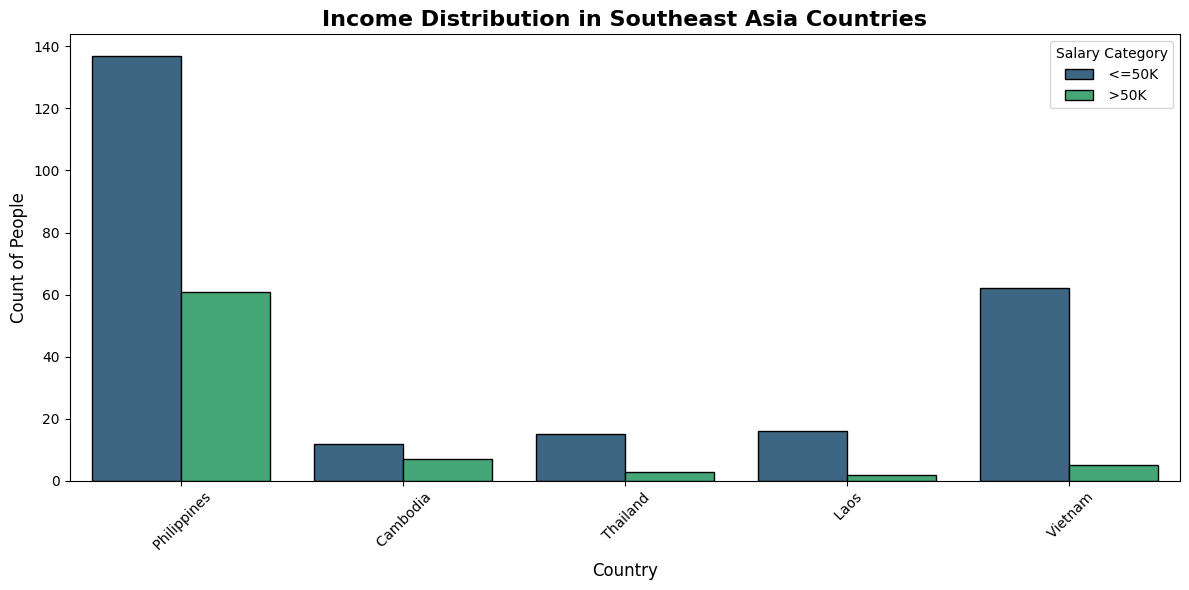

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าขนาดกราฟ
plt.figure(figsize=(12, 6))

# สร้างกราฟแท่งเปรียบเทียบรายได้แยกตามประเทศ
sns.countplot(data=data_se_asia,
              x='native-country',
              hue='salary',
              palette='viridis',
              edgecolor='black')

plt.title('Income Distribution in Southeast Asia Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.legend(title='Salary Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# นับจำนวนตัวอย่างในแต่ละประเทศ
country_counts = data_se_asia['native-country'].value_counts()

print("Sample size of each country:")
print(country_counts)

Sample size of each country:
native-country
Philippines    198
Vietnam         67
Cambodia        19
Thailand        18
Laos            18
Name: count, dtype: int64


/tmp/ipython-input-2871113130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=salary_counts.index, y=salary_counts.values, palette='viridis')


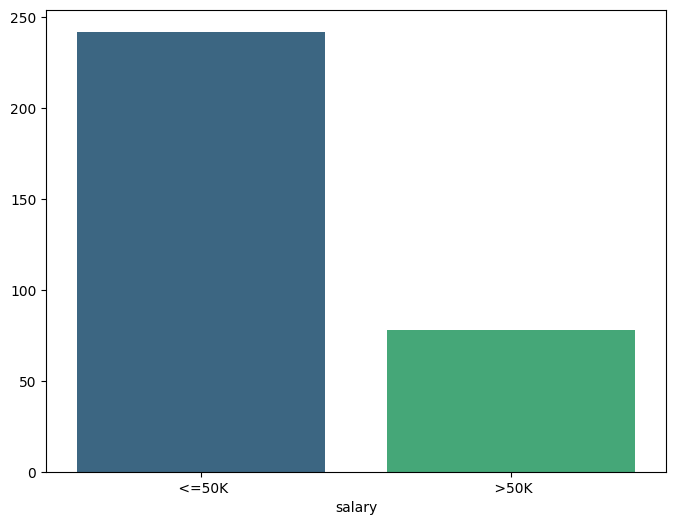

In [14]:
# นับความถี่ของค่าในคอลัมน์ salary
salary_counts = data_se_asia['salary'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=salary_counts.index, y=salary_counts.values, palette='viridis')

In [15]:
list(data_se_asia.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [16]:
print(data_se_asia['native-country'].unique())

[' Philippines' ' Cambodia' ' Thailand' ' Laos' ' Vietnam']


In [17]:
#แปลงตัวแปร binary >> 0 1

data_se_asia.loc[:, 'sex'] = data_se_asia['sex'].astype(str).str.strip().str.title()
data_se_asia.loc[:, 'sex'] = data_se_asia['sex'].map({'Male':1, 'Female':0})

data_se_asia.loc[:, 'salary'] = data_se_asia['salary'].astype(str).str.strip().str.title()
data_se_asia.loc[:, 'salary'] = data_se_asia['salary'].map({'>50K':1, '<=50K':0})


In [18]:
print(data_se_asia[data_se_asia['sex'].isna()])
print(data_se_asia[data_se_asia['salary'].isna()])
# Map checking


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []


Label
Salary : >50K':1, '<=50K':0

In [19]:
data_se_asia['salary']

,salary
152,0
255,1
265,1
304,0
434,0
...,...
32129,1
32199,1
32203,1
32370,1


In [20]:
data_se_asia['sex']

,sex
152,0
255,1
265,1
304,0
434,1
...,...
32129,1
32199,1
32203,1
32370,1


In [21]:
data_se_asia

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,0,40,Philippines,0
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,1,0,0,40,Cambodia,1
265,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,1,0,0,75,Thailand,1
304,24,Private,303296,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Laos,0
434,27,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,1,0,1980,40,Philippines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1


In [22]:
data_se_asia.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Philippines,0


# 4.Data preparation


preprocess คือ (categorical -> 0/1, continuous -> scaled)

เอเชียตะวันออกเฉียงใต้ (Southeast Asia)




In [21]:
# กำหนดรายชื่อประเทศ SE Asia
#se_asia_countries = [' Thailand', ' Vietnam', ' Laos', ' Philippines',' Cambodia']

# กรอง DataFrame
#data_se_asia = data[data['native-country'].isin(se_asia_countries)]

# ตรวจสอบผล
#print(data_se_asia['native-country'].unique())
#print(data_se_asia.head())
# Already done previously

Show an example output (Laos)




In [23]:
#Test
# กำหนดรายชื่อประเทศ SE Asia
Laos = [' Laos']

# กรอง DataFrame
Laos = data[data['native-country'].isin(Laos)]

# ตรวจสอบผล
print(Laos['native-country'].unique())
print(Laos.head())

[' Laos']
       age workclass  fnlwgt      education  education-num  \
304     24   Private  303296   Some-college             10   
4610    30   Private  350979        HS-grad              9   
5971    53   Private   97411        5th-6th              3   
6853    36   Private  228157   Some-college             10   
15310   19         ?  109938           11th              7   

            marital-status          occupation    relationship  \
304     Married-civ-spouse        Adm-clerical            Wife   
4610    Married-civ-spouse        Craft-repair         Husband   
5971    Married-civ-spouse   Machine-op-inspct         Husband   
6853         Never-married        Craft-repair   Not-in-family   
15310   Married-civ-spouse                   ?            Wife   

                      race      sex  capital-gain  capital-loss  \
304     Asian-Pac-Islander   Female             0             0   
4610    Asian-Pac-Islander     Male             0             0   
5971    Asian-Pac-I

In [24]:
data_se_asia.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [25]:
print(data_se_asia['native-country'].value_counts()) #Check

native-country
Philippines    198
Vietnam         67
Cambodia        19
Thailand        18
Laos            18
Name: count, dtype: int64


## Dummy

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

categorical_cols = ['workclass','education','marital-status','occupation',
                    'relationship','race','sex','native-country']

continuous_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
data_encoded = pd.get_dummies(data_se_asia, columns=categorical_cols, drop_first= False)


# Standardized
Apply standardization to ensure that features with smaller scales are not overshadowed by larger ones

In [40]:
X_encoded = data_encoded.drop('salary', axis=1) #Feature
y = data_encoded['salary'].astype(int) # Class

In [48]:
#Standardize ข้อมูลทั้งหมด (67 features จาก X_encoded ของคุณ)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [49]:
X_encoded.shape

(320, 67)

In [50]:
print(X_encoded.head())



          age    fnlwgt  education-num  capital-gain  capital-loss  \
152 -0.363856 -0.085578       0.867024     -0.137746     -0.220111   
255  0.332890  1.477612      -0.449454     -0.137746     -0.220111   
265 -0.054191  0.966945      -0.120334     -0.137746     -0.220111   
304 -1.060602  1.480425      -0.120334     -0.137746     -0.220111   
434 -0.828354 -0.606247      -0.120334     -0.137746      4.602234   

     hours-per-week  workclass_ ?  workclass_ Federal-gov  \
152        0.038178         False                   False   
255        0.038178         False                   False   
265        3.159310         False                   False   
304        0.038178         False                   False   
434        0.038178         False                   False   

     workclass_ Local-gov  workclass_ Private  ...  race_ Asian-Pac-Islander  \
152                 False                True  ...                      True   
255                 False               False  ...  

In [52]:
print(X_encoded.shape)  # จะเห็นจำนวน column หลัง one-hot encoding , 1 colunm : 1 Dummy category ,That's why we obtain too many column.

(320, 67)


After One-Hot Encoding, The feature is raised to 68 columns

In [53]:
print(X_encoded.columns.tolist())


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaner

In [ ]:
# @title
print(data_encoded.head())
print(data_encoded.shape)
print(data_encoded.dtypes)


In [ ]:
# @title
data_encoded.head()


# PCA

In [55]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [85]:
import numpy as np

In [31]:
# @title
X = data_encoded.drop('salary', axis=1)   # แยกเอาแค่ตัวแปรอิสระ by Deleting the class
y = data_encoded['salary']                # ตัวแปรที่ต้องการทำนาย (optional)


In [56]:
pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

In [59]:
cum_var = np.cumsum(pca_full.explained_variance_ratio_) * 100

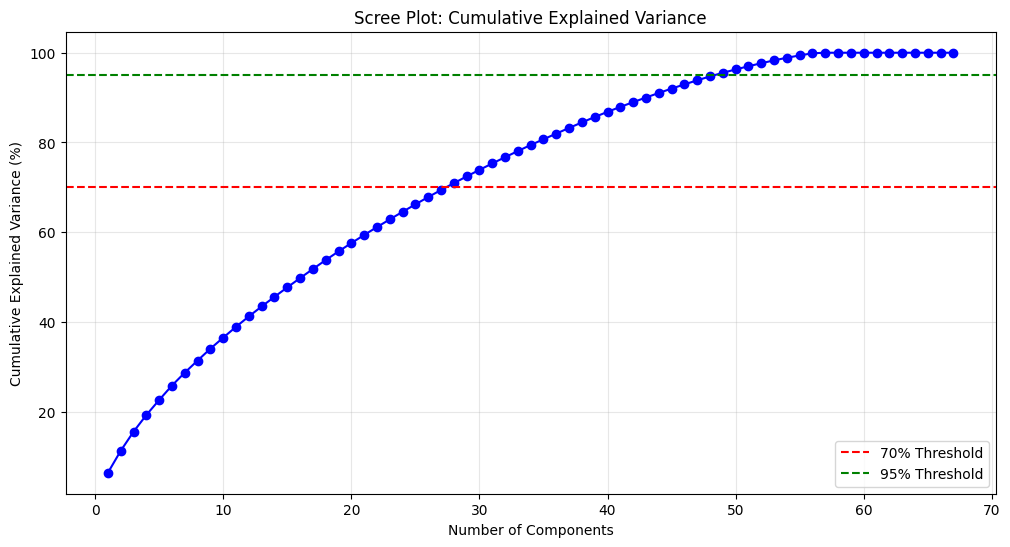

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='-', color='b')
plt.axhline(y=70, color='r', linestyle='--', label='70% Threshold')
plt.axhline(y=95, color='g', linestyle='--', label='95% Threshold')

plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [61]:
import matplotlib.pyplot as plt

In [62]:
exp_var_ratio = pca_full.explained_variance_ratio_
cum_var_res = np.cumsum(exp_var_ratio)

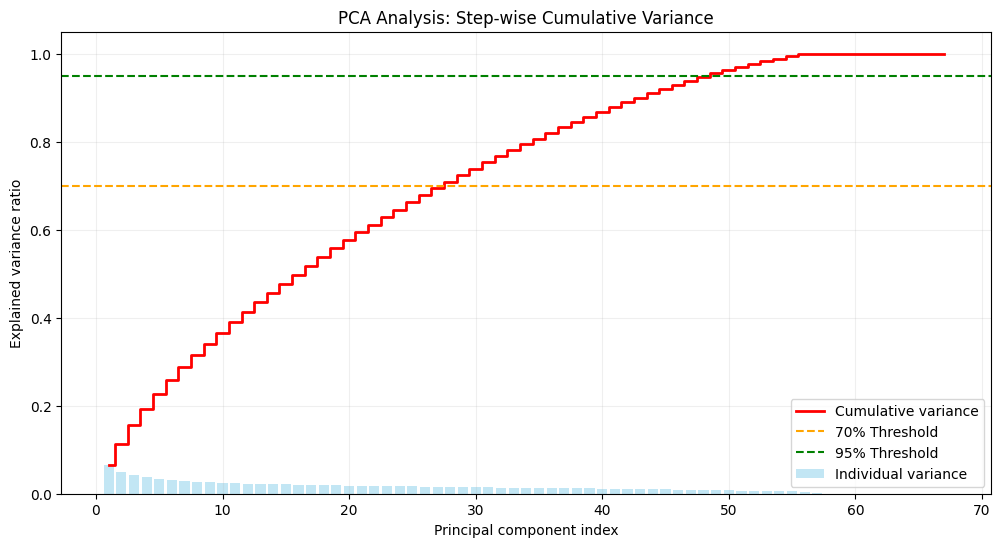

In [63]:
plt.figure(figsize=(12, 6))

# พลอตแท่ง Variance ของแต่ละ Component (Individual)
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio, alpha=0.5, align='center',
        label='Individual variance', color='skyblue')

# พลอตเส้นบันไดสะสม (Cumulative)
plt.step(range(1, len(cum_var_res) + 1), cum_var_res, where='mid',
         label='Cumulative variance', color='red', linewidth=2)

# 3. เพิ่มเส้นบอกเกณฑ์ (Threshold)
plt.axhline(y=0.70, color='orange', linestyle='--', label='70% Threshold')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')

# 4. ตกแต่งกราฟ
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA Analysis: Step-wise Cumulative Variance')
plt.legend(loc='best')
plt.grid(True, alpha=0.2)
plt.show()

In [33]:
# กำหนดจำนวน components ที่ต้องการ เช่น 0.95 เพื่อเก็บข้อมูล 95% ของความแปรปรวน
#pca = PCA(n_components=0.95)
#X_pca = pca.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Logistics Regression

In [72]:
# 1. รัน PCA ใหม่ด้วยจำนวนที่แม่นยำจากกราฟขั้นบันได
pca_final = PCA(n_components=20)
X_pca_final = pca_final.fit_transform(X_scaled) # X ที่สเกลทั้ง 67 ตัวแล้ว

# 1. แยกก้อน Test ออกไปก่อน (ห้ามแตะจนกว่าจะจบ)
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.3, random_state=42)

# 2. ขั้นตอน Validation (ทำบนก้อน Train เท่านั้น)
# เราจะแบ่ง Train เป็น 5 ส่วน สลับกันตรวจ (5-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_val = LogisticRegression(class_weight='balanced', solver='liblinear')

# รันเพื่อดูว่าในก้อน Train โมเดลทำผลงานได้เสถียรแค่ไหน (นี่คือการทำ Validation)
cv_scores = cross_val_score(model_val, X_train, y_train, cv=cv, scoring='f1')

print(f"Validation F1-Scores: {cv_scores}")
print(f"Mean Validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Validation F1-Scores: [0.83333333 0.63636364 0.61538462 0.62068966 0.59259259]
Mean Validation Score: 0.6597 (+/- 0.1759)


## Seeking the number of components give the highest F1-score

Components: 3 | Mean F1-Score: 0.6451
Components: 4 | Mean F1-Score: 0.6358
Components: 5 | Mean F1-Score: 0.6263
Components: 6 | Mean F1-Score: 0.6327
Components: 7 | Mean F1-Score: 0.6304
Components: 8 | Mean F1-Score: 0.6425
Components: 9 | Mean F1-Score: 0.6771
Components: 10 | Mean F1-Score: 0.6897
Components: 11 | Mean F1-Score: 0.6866
Components: 12 | Mean F1-Score: 0.6851
Components: 13 | Mean F1-Score: 0.6938
Components: 14 | Mean F1-Score: 0.6752
Components: 15 | Mean F1-Score: 0.6677
Components: 16 | Mean F1-Score: 0.6754
Components: 17 | Mean F1-Score: 0.6630
Components: 18 | Mean F1-Score: 0.6849
Components: 19 | Mean F1-Score: 0.6849
Components: 20 | Mean F1-Score: 0.6744
Components: 21 | Mean F1-Score: 0.6794
Components: 22 | Mean F1-Score: 0.6837
Components: 23 | Mean F1-Score: 0.6746
Components: 24 | Mean F1-Score: 0.6650
Components: 25 | Mean F1-Score: 0.6569
Components: 26 | Mean F1-Score: 0.6679
Components: 27 | Mean F1-Score: 0.6779
Components: 28 | Mean F1-Score: 

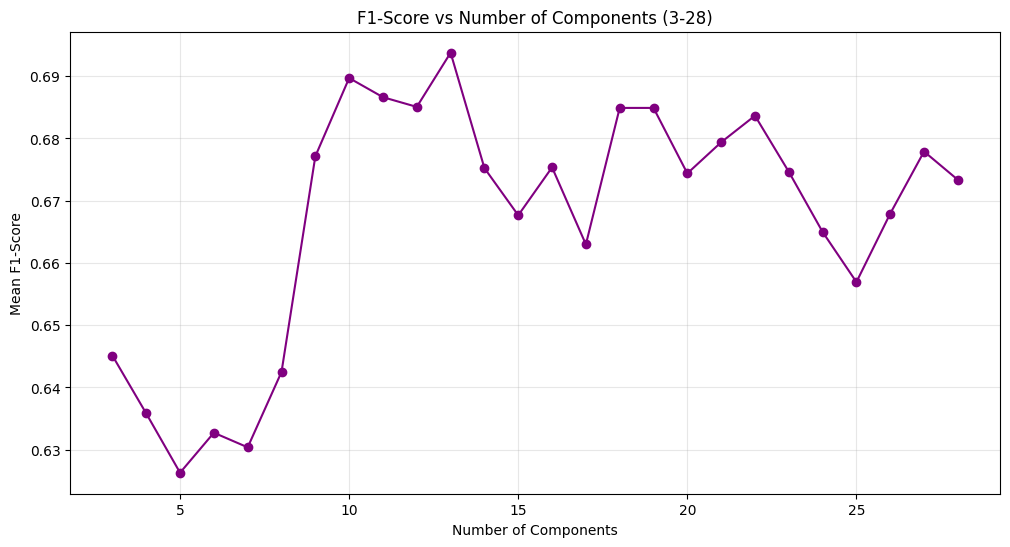


--- สรุปผล ---
The number of Component : 13
Maximum F1-Score : 0.6938


In [86]:
results = []
components_range = range(3, 29) # ทดสอบตั้งแต่ 3 ถึง 28

for n in components_range:
    # 2. ทำ PCA ตามจำนวน component นั้นๆ
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)

    # 3. นิยามโมเดล (ใช้ค่าคงที่เพื่อให้เปรียบเทียบได้ยุติธรรม)
    model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

    # 4. วัดผลด้วย Cross-Validation (F1-Score)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_pca, y, cv=cv, scoring='f1')

    results.append(scores.mean())
    print(f"Components: {n} | Mean F1-Score: {scores.mean():.4f}")

# 5. พลอตกราฟเปรียบเทียบหาจุดที่แม่นที่สุด
plt.figure(figsize=(12, 6))
plt.plot(components_range, results, marker='o', linestyle='-', color='purple')
plt.title('F1-Score vs Number of Components (3-28)')
plt.xlabel('Number of Components')
plt.ylabel('Mean F1-Score')
plt.grid(True, alpha=0.3)
plt.show()

# สรุปค่าที่ดีที่สุด
best_n = components_range[np.argmax(results)]
print(f"\n--- สรุปผล ---")
print(f"The number of Component : {best_n}")
print(f"Maximum F1-Score : {max(results):.4f}")

## Test the model, Implementation on test set

In [80]:
# 1. ทำ PCA ด้วยจำนวนที่ดีที่สุดคือ 13 components
pca_final = PCA(n_components=13)
X_pca_final = pca_final.fit_transform(X_scaled) # สเกลทั้ง 67 features

# 2. แบ่งข้อมูล Train/Test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.3, random_state=42)

# 3. เทรนโมเดล Logistic Regression
final_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
final_model.fit(X_train, y_train)

# 4. สรุปผล Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = final_model.predict(X_test)

print("--- Final Result on Test Set (13 Components) ---")
print(confusion_matrix(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

--- Final Result on Test Set (13 Components) ---
[[57 12]
 [ 5 22]]

               precision    recall  f1-score   support

           0       0.92      0.83      0.87        69
           1       0.65      0.81      0.72        27

    accuracy                           0.82        96
   macro avg       0.78      0.82      0.80        96
weighted avg       0.84      0.82      0.83        96



## Explore error

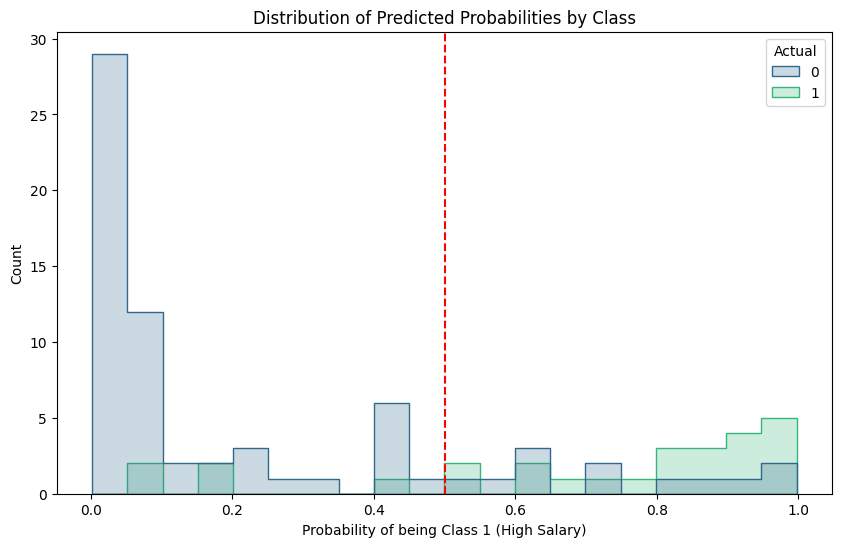

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. ดึงค่าความน่าจะเป็น (Probability) ออกมา
y_prob = final_model.predict_proba(X_test)[:, 1]

# 2. สร้าง DataFrame เพื่อเปรียบเทียบค่าจริงกับค่าที่ทาย
results_df = pd.DataFrame({'Actual': y_test, 'Prob': y_prob})

# 3. พลอตกราฟการกระจาย
plt.figure(figsize=(10, 6))
sns.histplot(data=results_df, x='Prob', hue='Actual', element='step', palette='viridis', bins=20)
plt.axvline(0.5, color='red', linestyle='--') # เส้นแบ่งการทำนาย
plt.title('Distribution of Predicted Probabilities by Class')
plt.xlabel('Probability of being Class 1 (High Salary)')
plt.ylabel('Count')
plt.show()

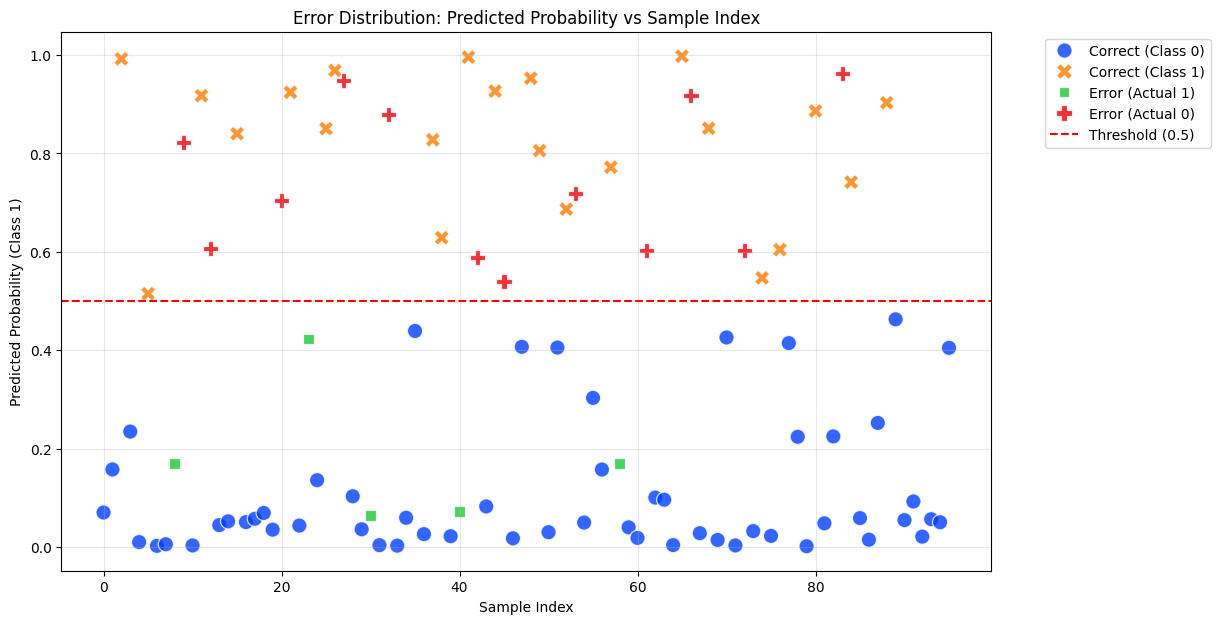

In [84]:

# 1. เตรียมข้อมูลเพื่อบอกว่าแต่ละจุดทายถูกหรือผิด
y_prob = final_model.predict_proba(X_test)[:, 1]
y_pred = final_model.predict(X_test)

results_df = pd.DataFrame({
    'Index': range(len(y_test)),
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability': y_prob
})

# สร้างคอลัมน์ใหม่เพื่อบอกประเภทผลลัพธ์ (ทายถูก/ทายผิด)
def get_result_type(row):
    if row['Actual'] == row['Predicted']:
        return f"Correct (Class {int(row['Actual'])})"
    else:
        return f"Error (Actual {int(row['Actual'])})"

results_df['Result_Type'] = results_df.apply(get_result_type, axis=1)

# 2. สร้าง Scatter Plot
plt.figure(figsize=(12, 7))

# ใช้ 'Result_Type' เป็น hue เพื่อแยกสีและสร้าง Legend อัตโนมัติโดยไม่ติด Error
sns.scatterplot(data=results_df, x='Index', y='Probability',
                hue='Result_Type', style='Result_Type',
                palette='bright', s=120, alpha=0.8, edgecolor='w')

# 3. เพิ่มเส้นแบ่ง Decision Boundary (0.5)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')

plt.title('Error Distribution: Predicted Probability vs Sample Index')
plt.ylabel('Predicted Probability (Class 1)')
plt.xlabel('Sample Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

In [89]:
#Check the number of sample before classificatio
print(f"the number of sample in Dataset: {X_encoded.shape[0]} คน")

#Check the number of sample Train and Test (70/30)
print(f"the number of sample (Train Set): {len(X_train)} คน")
print(f"the number of sample (Test Set): {len(X_test)} คน")

# 3. เช็คสัดส่วนรายได้ในกลุ่มทดสอบ (Test Set) เพื่อดูความสมดุล
print("\nthe proportion of sample(Test Set):")
print(y_test.value_counts())

the number of sample in Dataset: 320 คน
the number of sample (Train Set): 224 คน
the number of sample (Test Set): 96 คน

the proportion of sample(Test Set):
salary
0    69
1    27
Name: count, dtype: int64




---







---



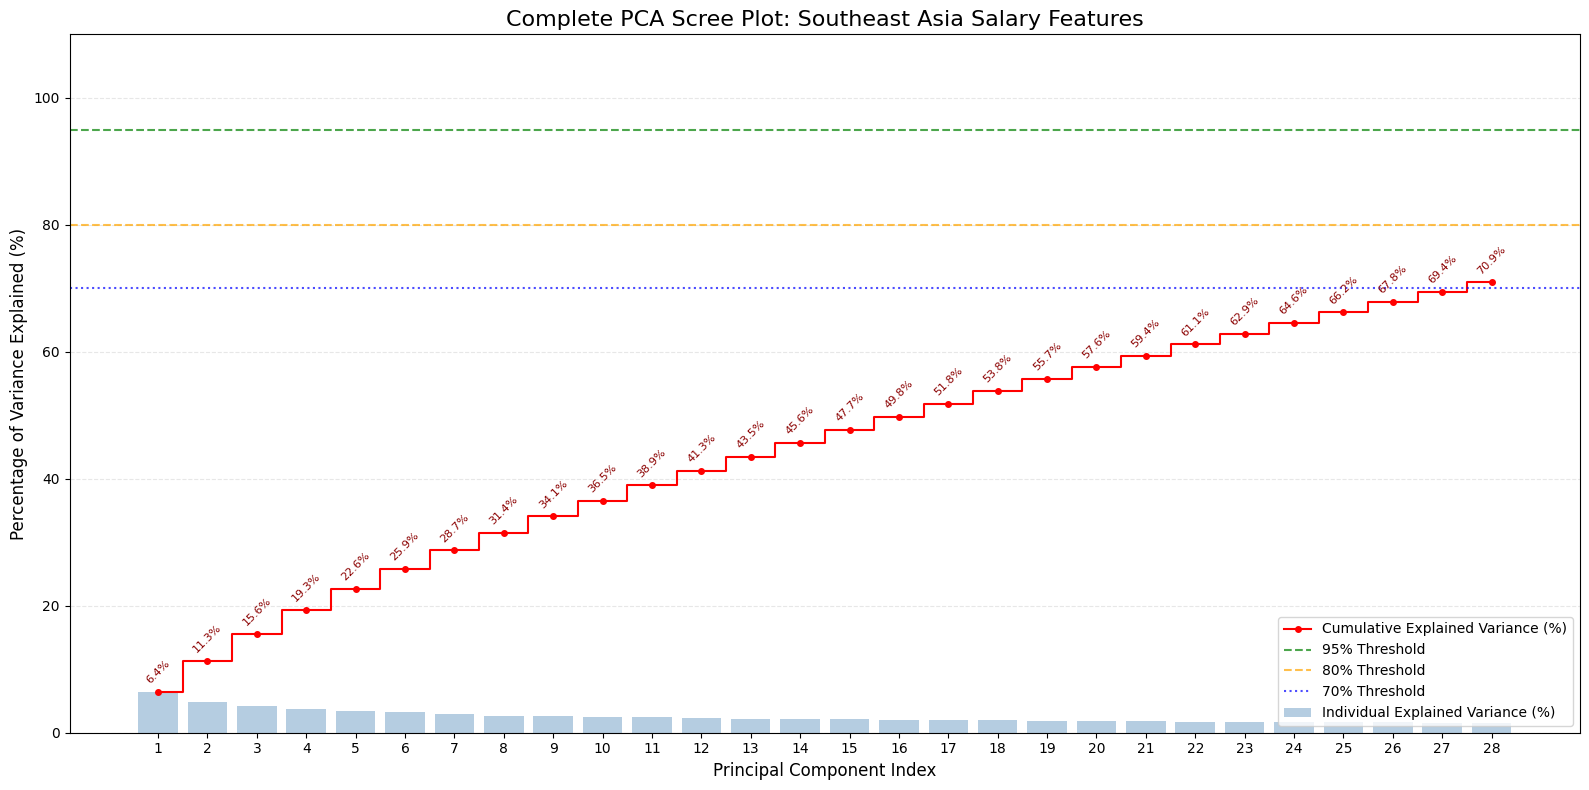

In [75]:
# @title
import matplotlib.pyplot as plt
import numpy as np


# 1. เตรียมข้อมูลเปอร์เซ็นต์
exp_var_ratio = pca.explained_variance_ratio_ * 100
cum_var_ratio = np.cumsum(pca.explained_variance_ratio_) * 100
n_components = len(exp_var_ratio)

# 2. สร้างกราฟ
plt.figure(figsize=(16, 8))

# พลอตแท่ง Individual Variance
bars = plt.bar(range(1, n_components + 1), exp_var_ratio, alpha=0.4,
               color='steelblue', label='Individual Explained Variance (%)')

# พลอตเส้นสะสม Cumulative Variance
line = plt.step(range(1, n_components + 1), cum_var_ratio, where='mid',
                color='red', marker='o', markersize=4, label='Cumulative Explained Variance (%)')

# 3. ใส่ตัวเลข % สะสมกำทุกจุด (ใช้ Loop วนให้ครบทุก Components)
for i, val in enumerate(cum_var_ratio):
    plt.text(i + 1, val + 1, f'{val:.1f}%', ha='center', va='bottom',
             fontsize=8, rotation=45, color='darkred')

# 4. ใส่เส้นเกณฑ์มาตรฐาน (Thresholds)
plt.axhline(y=95, color='green', linestyle='--', alpha=0.7, label='95% Threshold')
plt.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% Threshold')
plt.axhline(y=70, color='blue', linestyle=':', alpha=0.7, label='70% Threshold')

# 5. ตกแต่งแกนและชื่อกราฟ
plt.title('Complete PCA Scree Plot: Southeast Asia Salary Features', fontsize=16)
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Percentage of Variance Explained (%)', fontsize=12)
plt.xticks(range(1, n_components + 1)) # แสดงเลข Index ทุกตัว
plt.ylim(0, 110) # เผื่อพื้นที่ด้านบนให้ตัวเลข Label
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [76]:
# @title

X_pca.shape

(320, 28)

In [77]:
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

Eigenvalues: [4.32517547 3.2881459  2.85566376 2.49864828 2.25024566 2.16333922
 1.93065089 1.80986169 1.77694168 1.65234602 1.62033014 1.55570684
 1.491489   1.43835011 1.41896407 1.38864033 1.36111813 1.33940936
 1.29372596 1.24467232 1.2155823  1.17981997 1.1546989  1.13462196
 1.11310427 1.09643907 1.05331502 1.02068064]


In [78]:
explained_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_ratio)
print("Total explained variance:", sum(explained_ratio))


Explained variance ratio: [0.06435312 0.04892344 0.04248865 0.03717672 0.0334808  0.03218774
 0.02872564 0.02692845 0.02643864 0.02458481 0.02410846 0.02314694
 0.02219146 0.02140082 0.02111239 0.02066121 0.02025171 0.01992871
 0.019249   0.01851915 0.01808632 0.01755422 0.01718045 0.01688174
 0.01656158 0.01631362 0.01567199 0.01518643]
Total explained variance: 0.7092942229993396


In [79]:
n_components = pca.n_components_
print("Number of components selected:", n_components)


Number of components selected: 28


### Select 8 Components, Explain 70% of Variance Ratio

In [39]:
X = data_encoded.values  # แปลง DataFrame เป็น numpy array
pca = PCA(n_components=0.7)
X_pca = pca.fit_transform(X)


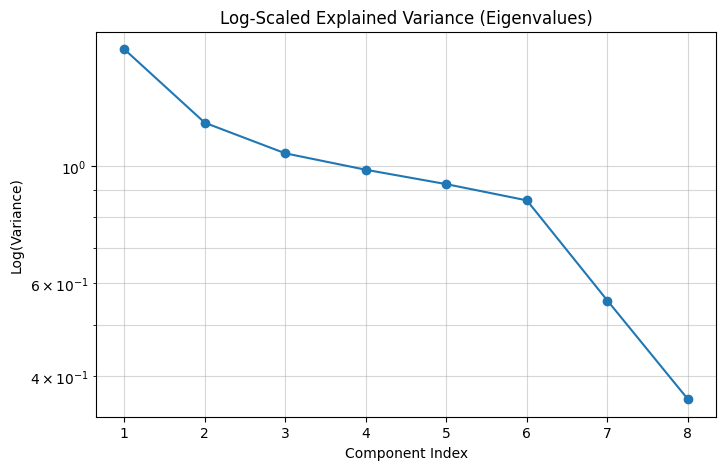

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.yscale('log') # เปลี่ยนแกน Y เป็น Log Scale
plt.title('Log-Scaled Explained Variance (Eigenvalues)')
plt.ylabel('Log(Variance)')
plt.xlabel('Component Index')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

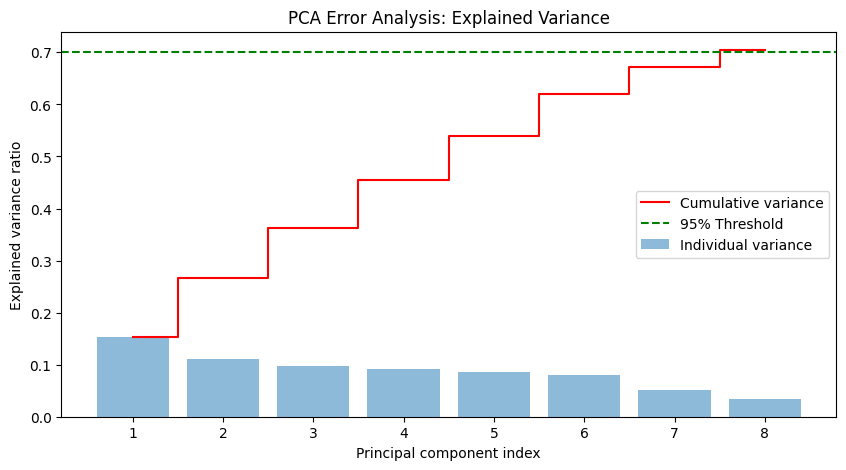

In [41]:

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
# พลอตแท่ง Variance ของแต่ละ Component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual variance')
# พลอตเส้นสะสม (Cumulative)
plt.step(range(1, len(exp_var_cumul) + 1), exp_var_cumul, where='mid', label='Cumulative variance', color='red')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.axhline(y=0.7, color='g', linestyle='--', label='95% Threshold') # เส้นบอกเกณฑ์ที่คุณเลือก
plt.legend(loc='best')
plt.title('PCA Error Analysis: Explained Variance')
plt.show()

# Checking

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
# Eigenvalues ของแต่ละ Principal Component
print("Eigenvalues:")
print(pca.explained_variance_)

# Eigenvectors หรือ Loading Matrix
print("\nEigenvectors (principal axes in feature space):")
print(pca.components_)

# สัดส่วนความแปรปรวนที่แต่ละ PC อธิบายได้
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

# สัดส่วนความแปรปรวนสะสม
import numpy as np
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))


# Tuning an appropriated components to minimize class1 error

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [45]:
# เช็คขนาดข้อมูลก่อนรัน PCA
print(f"ขนาดของข้อมูล (Rows, Columns): {X_scaled.shape}")

# ถ้า Columns มีแค่ 6 แต่คุณจะเอา 8 มันจะ Error
# วิธีแก้คือลด n_components ลงให้ไม่เกินค่าที่น้อยที่สุดของ shape
n_limit = min(X_scaled.shape[0], X_scaled.shape[1])
print(f"คุณสามารถตั้ง n_components ได้สูงสุดแค่: {n_limit}")

ขนาดของข้อมูล (Rows, Columns): (320, 6)
คุณสามารถตั้ง n_components ได้สูงสุดแค่: 6


# 5. Modeling

In [53]:
# สมมติว่า y คือ label

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)


In [72]:
# 1. แบ่งข้อมูลออกเป็นส่วนสำหรับ Train (80%) และส่วนสำหรับ Test สุดท้าย (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# 2. แบ่งส่วน Train (80%) ออกเป็น Train จริงๆ (60%) และ Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42 # 0.25 * 0.8 = 0.2
)

In [54]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)



*หมายความว่า* train_test_split ทำงานถูกต้องแล้ว

สัดส่วน train:test ≈ 224:96 → ประมาณ 70% train / 30% test ตามที่ตั้งค่า test_size=0.3

50 : 50 เรียนรู้น้อยเกินไป


80 : 20 Bias Training

In [55]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (224, 8)
X_test shape: (96, 8)
y_train shape: (224,)
y_test shape: (96,)


In [56]:
print(y_train[:10])
print(y_train.dtype)
print(y_train.nunique())  # ถ้าเป็น pandas Series


4919     0
22618    0
15403    0
19501    1
32129    1
11354    0
27714    0
7909     0
20825    0
2590     0
Name: salary, dtype: int64
int64
2


In [57]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [58]:
print(y_train.dtype)


int64


# Developed Logistic Regression Model

In [59]:
model = LogisticRegression(max_iter=1000)  # max_iter เพิ่มเผื่อ converge ช้า
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [60]:
y_proba = model.predict_proba(X_test)
y_proba

array([[9.61513922e-01, 3.84860780e-02],
       [9.60356582e-01, 3.96434185e-02],
       [1.81948781e-02, 9.81805122e-01],
       [9.76729532e-01, 2.32704684e-02],
       [9.88653417e-01, 1.13465826e-02],
       [4.55572476e-01, 5.44427524e-01],
       [9.94053900e-01, 5.94610032e-03],
       [9.99651261e-01, 3.48739131e-04],
       [3.41098330e-01, 6.58901670e-01],
       [5.81893240e-01, 4.18106760e-01],
       [9.92991459e-01, 7.00854081e-03],
       [1.71854855e-01, 8.28145145e-01],
       [8.17783186e-01, 1.82216814e-01],
       [9.93634735e-01, 6.36526514e-03],
       [9.99338822e-01, 6.61178156e-04],
       [1.91052274e-01, 8.08947726e-01],
       [9.98837216e-01, 1.16278423e-03],
       [9.71560900e-01, 2.84390998e-02],
       [9.98170380e-01, 1.82962018e-03],
       [9.88416302e-01, 1.15836979e-02],
       [7.69715397e-01, 2.30284603e-01],
       [1.51880508e-02, 9.84811949e-01],
       [9.91128620e-01, 8.87138042e-03],
       [7.37191082e-01, 2.62808918e-01],
       [9.856069

In [61]:
y_pred = model.predict(X_test)


Validation / Test###


P(Y=1)>0.5 โมเดลจะทำนายว่า เงินเดือน >50K

P(Y=1)≤0.5 โมเดลจะทำนายว่า เงินเดือน <=50K

In [62]:
print(y_pred)

[0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [63]:
len(y_pred)

96

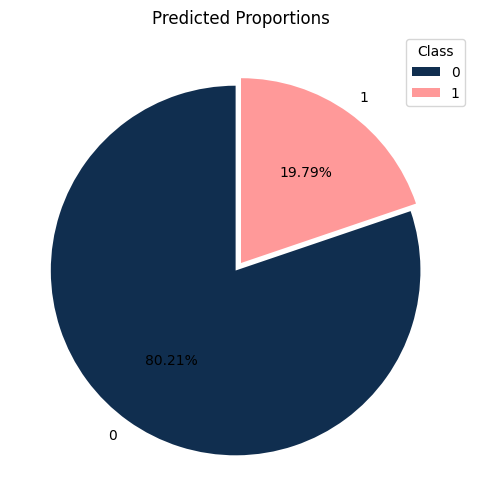

In [64]:
import numpy as np
pred_counts = pd.Series(y_pred).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pred_counts,
        labels=pred_counts.index,
        autopct='%1.2f%%',  # แสดงทศนิยม 2 ตำแหน่ง
        startangle=90,
        colors=['#102E4F', '#ff9999'],
        explode=(0.05, 0))  # แยกชิ้นส่วนแรกออกมาเล็กน้อยให้ดูมีมิติ

plt.title('Predicted Proportions')
plt.legend(title="Class")
plt.show()

# Evaluation Model < Confusion Matrix >

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[69  0]
 [ 8 19]]


In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9166666666666666


Data imbalance ทำให้ค่า class1 ถูกตรวจจับได้น้อย


In [67]:
from sklearn.metrics import classification_report

# แสดง precision, recall, f1-score ของแต่ละ class
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        69
           1       1.00      0.70      0.83        27

    accuracy                           0.92        96
   macro avg       0.95      0.85      0.89        96
weighted avg       0.93      0.92      0.91        96



In [68]:
# ดูว่า PC แต่ละตัวอธิบายข้อมูลไปกี่ %
print(pca.explained_variance_ratio_)
# ดูผลรวมสะสม

print(np.cumsum(pca.explained_variance_ratio_))

[0.15396356 0.11171982 0.09776423 0.09100611 0.08547042 0.07962603
 0.05143523 0.03344795]
[0.15396356 0.26568338 0.36344762 0.45445373 0.53992415 0.61955017
 0.67098541 0.70443336]


In [69]:
data_encoded['salary']

,salary
152,0
255,1
265,1
304,0
434,0
...,...
32129,1
32199,1
32203,1
32370,1


แปลง  y_train -> int

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
print("Coefficients:", model.coef_) #สัมประสิทธิ๋
print("Intercept:", model.intercept_) #constanct


Coefficients: [[ 1.66097054 -0.0116672  -0.34320619  0.16241764 -0.35995985  0.02590665
  -1.28059428  2.00118689 -0.28770588  0.2222891   0.58531052  0.76252985
   1.4898096  -0.71803209 -1.87827995  0.70342694 -0.25308076 -1.2130825
  -0.02013601 -1.09021163  1.13707593  0.3051088   1.11070631  0.49341706
  -0.18282366 -0.82224909  0.8264141  -0.15433411  0.22637137  0.3809396 ]]
Intercept: [-2.48546279]




---

---





## เลือกจำนวน Component จาก Scree Plot (6 component)

In [ ]:
import matplotlib.pyplot as plt


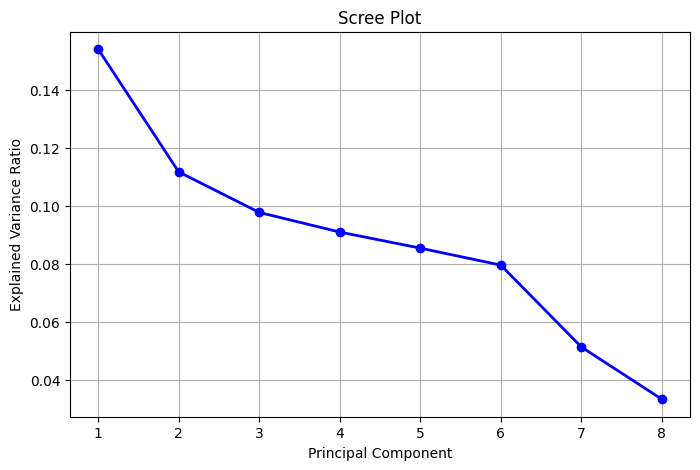

In [71]:

from sklearn.decomposition import PCA

# สมมติว่า pca คือ PCA object ที่ fit แล้ว
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.grid(True)
plt.show()


#Applying 6 Component from Scree plot

### ทำนายคลาสเงินเดือนในพื้นที่เอเชียตะวันออกเฉียงใต้ จากปัจจัยต่างๆ ที่ผ่านการทำ PCA เพื่อลด dimention ของข้อมูล และเลือกมา 6 components

In [ ]:
y_test

,salary
17877,0
23607,0
4055,1
7697,0
1609,0
...,...
17382,0
12675,0
21611,0
9371,0


In [ ]:
y_train

,salary
4919,0
22618,0
15403,0
19501,1
32129,1
...,...
19750,0
8414,0
11279,0
27874,0


In [ ]:
# 1. เลือกมาแค่ 6 คอลัมน์แรก (Index 0 ถึง 5)
X_pca_6 = X_pca[:, :6]

# 2. แบ่งข้อมูล
X_train_6, X_test_6, y_train, y_test = train_test_split(
    X_pca_6, y, test_size=0.3, random_state=42, stratify=y
)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# 3. สร้างและเทรนโมเดลใหม่
model_6 = LogisticRegression()
model_6.fit(X_train_6, y_train)

# 4. ทำนายและดูผล
y_pred_6 = model_6.predict(X_test_6)

In [ ]:
y_pred_6.shape

(96,)

In [ ]:
y_pred_6

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
cm6cp = confusion_matrix(y_test, y_pred_6)
cm6cp

array([[66,  7],
       [12, 11]])

## Compare the actual class and predicted class.

In [ ]:
import pandas as pd

# สร้าง DataFrame เปรียบเทียบ
df_compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_6
})

print(df_compare.head(10))  # ดู 10 ตัวอย่างแรก


       Actual  Predicted
19027       1          0
23220       0          0
23177       1          1
27214       1          0
10027       0          0
265         1          1
13706       0          0
255         1          0
25010       0          0
5560        1          0


โมเดลสามารถทำนาย class 0 (<=50K) ได้แม่นกว่า

โมเดล ไม่ค่อยแม่นในการจับคนที่มี class 1 (>50K)

การใช้ 6 PCA components ทำให้ accuracy ยังโอเค (0.78) แต่ recall สำหรับ class 1 ต่ำกว่าเมื่อใช้ 29 components

## Class 0 likly have any score more than class 1 because Data is imblance, class 0 larger than the other.

# Resolving : ใช้ metrics ที่ไม่ biased กับ class imbalance

### เช่น ROC-AUC, balanced accuracy, F1-score ของ class 1

# Data Analysis

# Southeast Asia income Analysis

Mostly southeast asia people has a salary under 50K

In [ ]:
data_se_asia

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,0,40,Philippines,0
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,1,0,0,40,Cambodia,1
265,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,1,0,0,75,Thailand,1
304,24,Private,303296,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Laos,0
434,27,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,1,0,1980,40,Philippines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1


In [ ]:
numeric_cols = data_se_asia.select_dtypes(include=['number'])

In [ ]:
numeric_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
152,33,163003,13,0,0,40
255,42,303044,9,0,0,40
265,37,257295,10,0,0,75
304,24,303296,10,0,0,40
434,27,116358,10,0,1980,40
...,...,...,...,...,...,...
32129,48,350440,10,0,0,40
32199,27,100669,10,0,0,40
32203,51,223206,16,15024,0,40
32370,53,137547,15,27828,0,40


## Class
 > more than 50K : 1

 > less than or equal 50K : 0

salary
0    36.404959
1    41.717949
Name: age, dtype: float64


<Axes: xlabel='salary', ylabel='hours-per-week'>

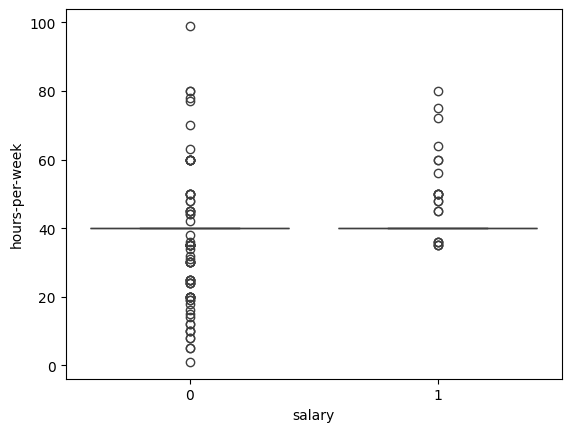

In [ ]:
# เปรียบเทียบอายุเฉลี่ยของคนสองกลุ่ม
print(data_se_asia.groupby('salary')['age'].mean())

# พลอตกราฟโดยใช้ salary เป็นตัวแบ่งสี (hue)
import seaborn as sns
sns.boxplot(x='salary', y='hours-per-week', data=data_se_asia)

##  Conclusion :
### The boxplot reveals distinct distribution patterns: the low-income group (<=50K) exhibits high variance with work hours spanning widely both above and below the median. In contrast, the high-income group (>50K) shows a distribution that is skewed towards higher values, tightly clustering above the median threshold, indicating a strong correlation between overtime work and higher salary tiers."

### Since the both median line are closed we considerate an average of work time instead.

In [ ]:
print(data_se_asia.groupby('salary')['hours-per-week'].mean())

salary
0    38.458678
1    43.025641
Name: hours-per-week, dtype: float64


# Conclusion :
class 0 ( Salary <= 50K ) an average of work hour for a week is 38.459 hours.

class 1 ( Salary >50K ) an average of work hour for a week is 40.025 hours.
### Quantitative analysis reveals a correlation between work intensity and income; the high-income segment averages 43 hours/week, exceeding the standard full-time threshold, whereas the lower-income segment averages 38 hours/week, reflecting a higher prevalence of part-time or hourly engagements.

# ABOUT THE PROJECT

Logistic Regression (Simple Model)

Since the data we query is small size using complex model can be a problem (overfitting)

Why we do PCA ?
  Based on rows if we use too many features with small data size it may perform your model overfitting.